In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:

# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:

# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:

# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [ ]:

# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

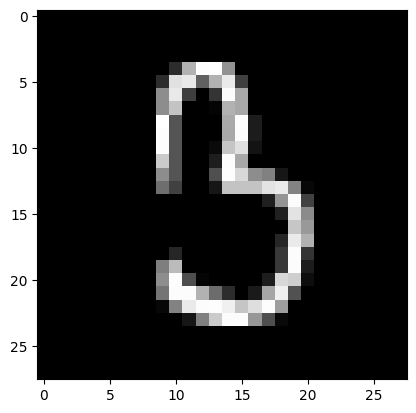

In [ ]:

# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

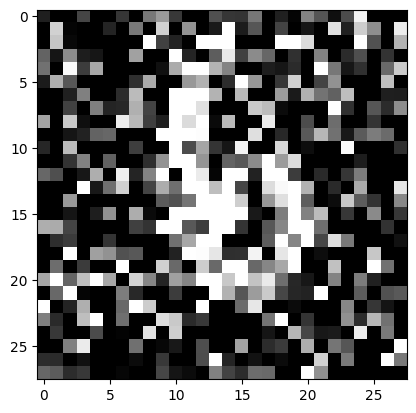

In [ ]:

# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()


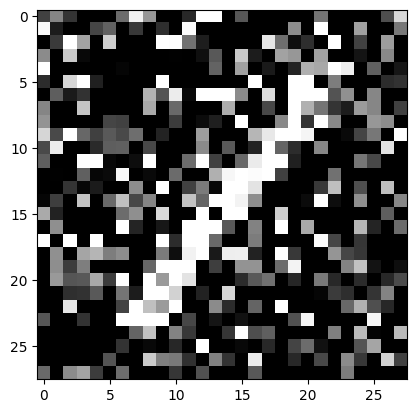

In [ ]:

# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()


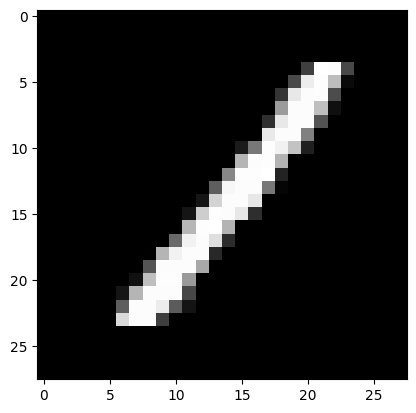

In [ ]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

In [ ]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 16)       

In [ ]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 59s 250ms/step - loss: 0.2419 - val_loss: 0.1494
Epoch 2/20
235/235 [==============================] - 59s 253ms/step - loss: 0.1430 - val_loss: 0.1361
Epoch 3/20
235/235 [==============================] - 59s 251ms/step - loss: 0.1347 - val_loss: 0.1312
Epoch 4/20
235/235 [==============================] - 58s 246ms/step - loss: 0.1302 - val_loss: 0.1276
Epoch 5/20
235/235 [==============================] - 61s 258ms/step - loss: 0.1270 - val_loss: 0.1241
Epoch 6/20
235/235 [==============================] - 58s 248ms/step - loss: 0.1247 - val_loss: 0.1224
Epoch 7/20
235/235 [==============================] - 59s 251ms/step - loss: 0.1229 - val_loss: 0.1209
Epoch 8/20
235/235 [==============================] - 59s 251ms/step - loss: 0.1217 - val_loss: 0.1204
Epoch 9/20
235/235 [==============================] - 57s 244ms/step - loss: 0.1204 - val_loss: 0.1185
Epoch 10/20
235/235 [==============================] - 57s 241ms/step - l

In [ ]:

# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)


313/313 [==============================] - 2s 8ms/step


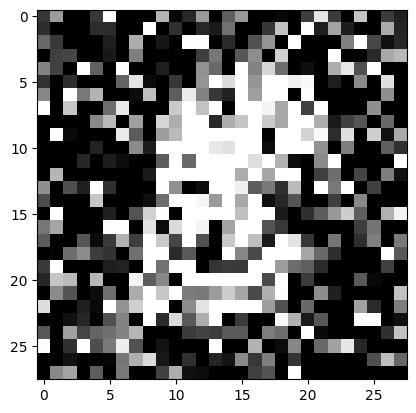

In [ ]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

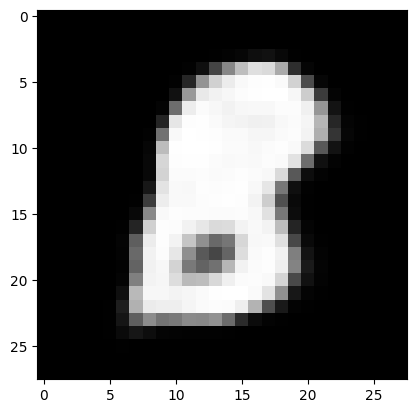

In [ ]:

# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

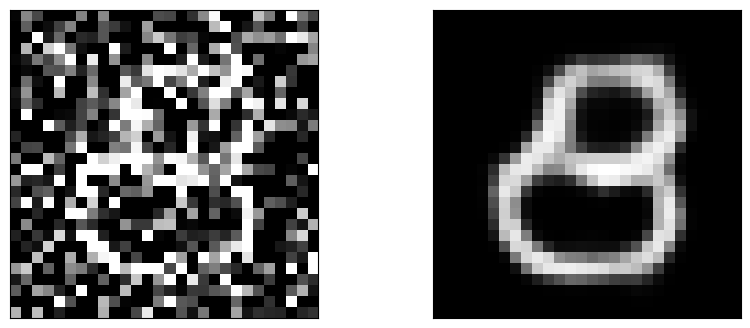

In [ ]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()


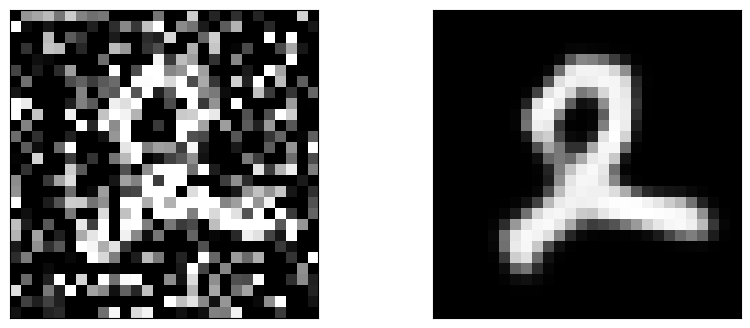

In [ ]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()